In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
from babel.numbers import format_currency

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
def load_data():
    file_path = "/content/drive/MyDrive/Colab Notebooks/DATA_VISUALIZATION/dislit_final.csv"
    df = pd.read_csv(file_path, header=0, sep=',')
    df["DataCriacao1"] = pd.to_datetime(df["DataCriacao1"], format="%d/%m/%Y")
    df['month'] =df["DataCriacao1"].dt.strftime('%b')
    df['year'] = df["DataCriacao1"].dt.year.astype(str)
    df['year_month'] = df["DataCriacao1"].dt.to_period("M").astype(str)
    df = df.drop(columns=['DataCriacao1'])
    return df

df = load_data()

In [58]:
print(df.columns)

Index(['Textbox2', 'NumPregão2', 'NumParticipantes', 'Orgao2', 'SIGLA',
       'Modalidade2', 'Data de Abertura', 'Objeto', 'ClassObjeto',
       'Razão Social', 'Total Adjudicado', 'Valor', 'month', 'year',
       'year_month'],
      dtype='object')


# TimeSeries

In [59]:
timseries = (
    df.groupby(by=["year_month"])
    .count()[['Valor']].reset_index()
)
timseries

,year_month,Valor
0,2019-01,2
1,2019-02,9
2,2019-03,34
3,2019-04,6
4,2019-05,6
...,...,...
62,2024-03,95
63,2024-04,94
64,2024-05,23
65,2024-06,0


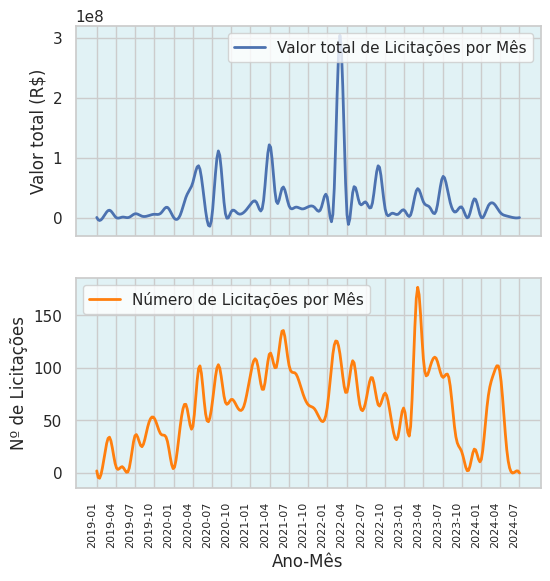

In [60]:
from scipy.interpolate import make_interp_spline

timseriesCount = (
    df.groupby(by=["year_month"])
    .count()[['Valor']].reset_index()
)

timseriesValue = (
    df.groupby(by=["year_month"])
    .sum()[['Valor']].reset_index()
)


fig, ax = plt.subplots(2, 1, figsize=(6, 6))

#grafico de valor
x =np.arange(len(timseriesValue['year_month']))
y = timseriesValue["Valor"]

spl = make_interp_spline(x, y, k=3)
x_smoothV = np.linspace(x.min(), x.max(), 300)  # pontos para suavização
y_smoothV = spl(x_smoothV)

ax[0].plot(x_smoothV, y_smoothV, label="Valor total de Licitações por Mês", linewidth=2)
ax[0].set_xticks(x)  # Posição original dos rótulos
ax[0].set_xticks(timseriesValue.index[::3])  # a cada três meses o label x
ax[0].set_xticklabels(timseriesValue["year_month"][::3], rotation=90, ha="right", fontsize= 8, color="white")
ax[0].set_xlabel("Ano-Mês")
ax[0].set_ylabel("Valor total (R$)")
ax[0].set_facecolor("#e1f2f5")
ax[0].legend()

#grafico de contagem
x =np.arange(len(timseriesCount['year_month']))
y = timseriesCount["Valor"]

spl = make_interp_spline(x, y, k=3)
x_smooth = np.linspace(x.min(), x.max(), 300)  # pontos para suavização
y_smooth = spl(x_smooth)


ax[1].plot(x_smooth, y_smooth, label="Número de Licitações por Mês", linewidth=2, color='#ff7f0e')
ax[1].set_xticks(x)  # Posição original dos rótulos
# ax.set_xticklabels(timseries["year_month"], rotation=90, ha="right")  # Rotacionando
ax[1].set_xticks(timseriesCount.index[::3])  # a cada três meses o label x
ax[1].set_xticklabels(timseriesCount["year_month"][::3], rotation=90, ha="right", fontsize= 8)
ax[1].set_xlabel("Ano-Mês")
ax[1].set_ylabel("Nº de Licitações")
ax[1].legend()
ax[1].set_facecolor("#e1f2f5")

plt.show()

# Valores por ano

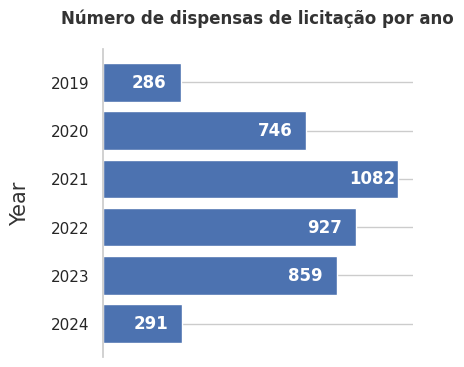

In [61]:
year_count = (
    df.groupby(by=["year"])
    .count()[['Valor']]
    .sort_values(by="year", ascending=False).reset_index()
)

fig, ax = plt.subplots(figsize=[4,4])

bars = plt.barh(year_count['year'], year_count['Valor'])
ax.spines[['right', 'top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars, padding=-35, color="white", fontweight="bold", fontsize= 12, label_type='edge')
ax.set_ylabel('Year', labelpad=15, color='#333333', fontsize= 15)
ax.set_title('Número de dispensas de licitação por ano', pad=18, color='#333333',
             weight='bold')
plt.show()


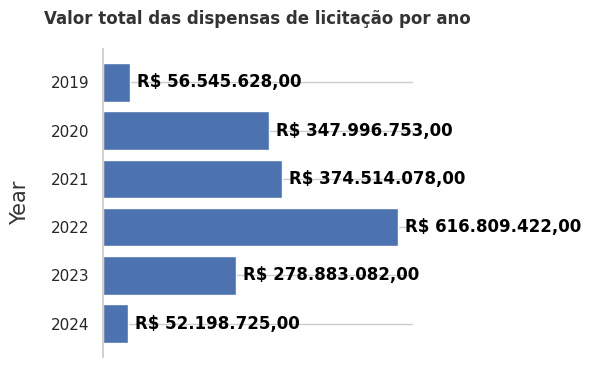

In [62]:
year_value = (
    df.groupby(by=["year"])
    .sum()[['Valor']]
    .sort_values(by="year", ascending=False)
)
year_value['Valor_Formatado'] = year_value['Valor'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR'))
year_value.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=[4,4])

bars = plt.barh(year_value['year'], year_value['Valor'])
ax.spines[['right', 'top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars, labels=year_value['Valor_Formatado'], padding=5, color="black", fontweight="bold", fontsize=12)
ax.set_ylabel('Year', labelpad=15, color='#333333', fontsize= 15)
ax.set_title('Valor total das dispensas de licitação por ano', pad=18, color='#333333',
             weight='bold')



plt.show()


In [76]:
year_value

,year,Valor,Valor_Formatado,Qtd_Licitacoes
0,2024,52198725.0,"R$ 52.198.725,00",291
1,2023,278883082.0,"R$ 278.883.082,00",859
2,2022,616809422.0,"R$ 616.809.422,00",927
3,2021,374514078.0,"R$ 374.514.078,00",1082
4,2020,347996753.0,"R$ 347.996.753,00",746
5,2019,56545628.0,"R$ 56.545.628,00",286


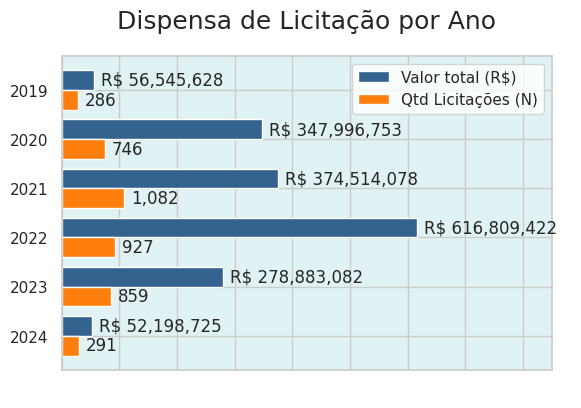

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

year_value['Valor_Formatado'] = year_value['Valor'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR'))
year_value['Qtd_Licitacoes'] = year_count['Valor']
ranking = year_value
first_bar = ranking['Valor']
first_bar_label = 'Valor total (R$)'
first_bar_color = '#32628d'

second_bar = ranking['Qtd_Licitacoes'] * 100000
second_bar_label = 'Qtd Licitações (N)'
second_bar_color = '#ff7f0e'

labels = ranking.index.astype(str)  # Certifique-se de que os rótulos são strings
width = 0.4  # Largura das barras
plot_title = 'Dispensa de Licitação por Ano'
title_size = 18

# Criar DataFrame auxiliar para verificação de valores
sec_bar = second_bar.reset_index()
qtd_licitacoes_set = set(sec_bar['Qtd_Licitacoes'])  # Converter para conjunto

fig, ax = plt.subplots(figsize=(8, 4))
plt.tight_layout()

# Criar localizações para as barras
y = np.arange(len(labels))

# Plot das barras duplas
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Formatando os ticks do eixo X
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim(0,850000000)
# Definir título corretamente
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([0.5, 1.05])

# Ajustar subplots
plt.subplots_adjust(left=0.35, top=0.9)


# Criar rótulos nas barras
for rect in ax.patches:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left' if x_value >= 0 else 'right'
    space = space if x_value >= 0 else -space

    # Verificar se é um valor de Qtd_Licitacoes
    if x_value in qtd_licitacoes_set:
        label = '{:,.0f}'.format(x_value / 100000)
    else:
        label = f'R$ {x_value:,.0f}'

    plt.annotate(label, (x_value, y_value), xytext=(space, 0), textcoords='offset points', va='center', ha=ha)

# Definir os rótulos do eixo Y corretamente
ax.set_yticks(y)
labels = ['2024','2023','2022','2021','2020','2019']
ax.set_yticklabels(labels)


# Adicionar legenda
ax.legend()
ax.tick_params(axis='x', colors='white')
ax.set_facecolor("#e1f2f5")
# Adicionar grid para facilitar a leitura
# ax.grid(True, axis='x', linestyle='--', alpha=0.6)


# Mostrar gráfico
plt.show()


#Secretarias com maior gasto

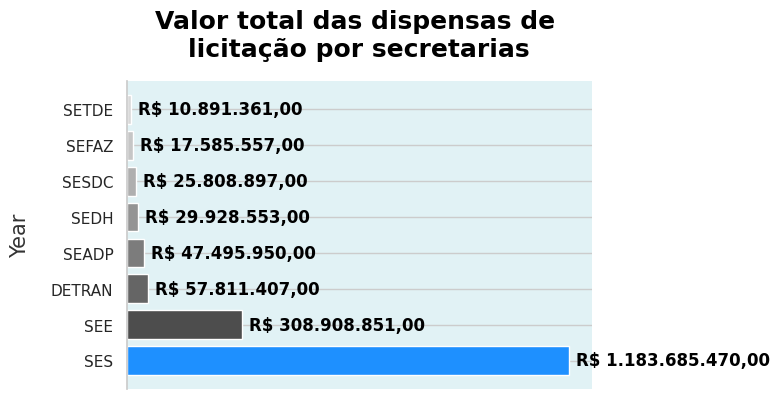

In [83]:
sec_value = (
    df.groupby(by=["SIGLA"])
    .sum()[['Valor']]
    .sort_values(by="SIGLA", ascending=True)
)

sec_value = sec_value.sort_values(by='Valor', ascending=False).head(8)
sec_value['Valor_Formatado'] = sec_value['Valor'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR'))
sec_value.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=[6,4])

x = sec_value['Valor']
labels = sec_value['SIGLA']
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.25, len(x))))
colors[0] = 'dodgerblue'
sec_value['colours'] = colors


bars = plt.barh(labels, x, color=sec_value['colours'])
ax.spines[['right', 'top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars, labels=sec_value['Valor_Formatado'], padding=5, color="black", fontweight="bold", fontsize=12)
ax.set_ylabel('Year', labelpad=15, color='#333333', fontsize= 15)
ax.set_title('Valor total das dispensas de \nlicitação por secretarias', pad=18, color='black',
             weight='bold', fontsize= 18)
ax.set_facecolor("#e1f2f5")




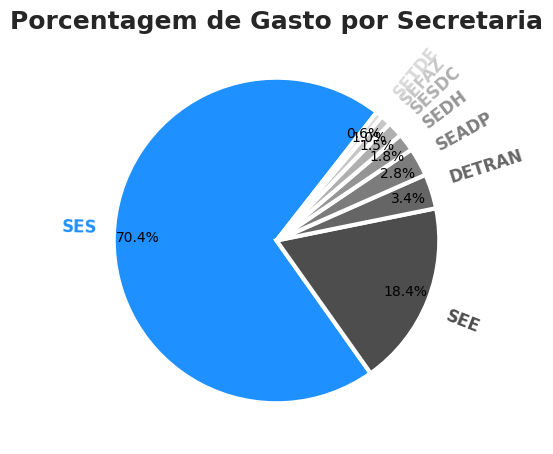

In [82]:

fig, ax = plt.subplots(figsize=(5, 5))
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.25, len(x))))
colors[0] = 'dodgerblue'

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=52, rotatelabels=True, pctdistance=0.85,
    colors=colors)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='black', fontsize=10)
plt.setp(texts, fontweight=600, fontsize=12)
ax.set_title('Porcentagem de Gasto por Secretaria', fontweight=600,fontsize=18)

plt.tight_layout()

plt.show()

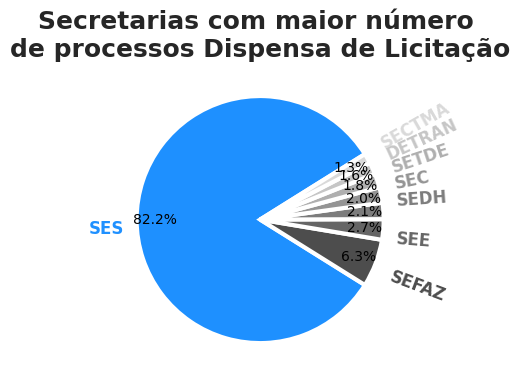

In [66]:
sec_count = (
    df.groupby(by=["SIGLA"])
    .count()[['Valor']]
    .sort_values(by="SIGLA", ascending=True)
)

sec_count = sec_count.sort_values(by='Valor', ascending=False).head(8)
sec_count.reset_index(inplace=True)


x = sec_count['Valor']
labels = sec_count['SIGLA']

# Get four different grey colors.
fig, ax = plt.subplots(figsize=(5, 4))
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.25, len(x))))
# Swap in a bright blue for the Lacrosse color.
colors[0] = 'dodgerblue'

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=32, rotatelabels=True, pctdistance=0.85,
    colors=colors)

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='black', fontsize=10)
plt.setp(texts, fontweight=600, fontsize=12)
ax.set_title('Secretarias com maior número \nde processos Dispensa de Licitação', fontweight=600,fontsize=18)

plt.tight_layout()

plt.show()


#Principais Objstos das Licitações

<ipython-input-84-99f48ffa53f8>:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


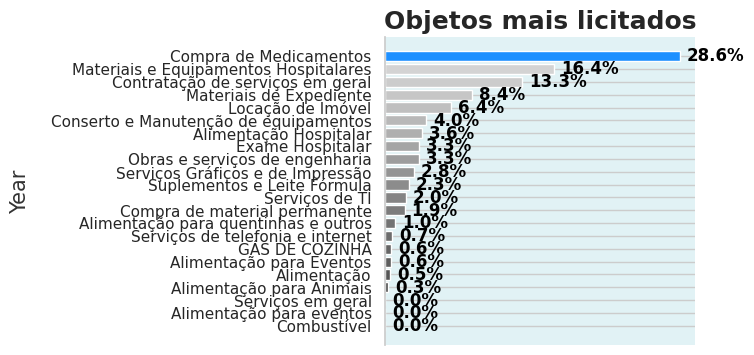

In [84]:
obj_count = (
    df.groupby("ClassObjeto")["Valor"]
    .count()
    .reset_index(name="Contagem")
)

# Adicionando a porcentagem
obj_count["Porcentagem"] = np.round((obj_count["Contagem"] / obj_count["Contagem"].sum()) * 100,1)

# Ordenando pelos nomes das classes
obj_count = obj_count.sort_values(by="Contagem", ascending=True)



x = obj_count['Porcentagem']
labels = obj_count['ClassObjeto']

# Get four different grey colors.
fig, ax = plt.subplots(figsize=[4,4])
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.85, 0.25, len(x))))
# Swap in a bright blue for the Lacrosse color.
colors[21] = 'dodgerblue'
obj_count['colours'] = colors


bars = plt.barh(labels, x, color=obj_count['colours'])
ax.spines[['right', 'top','bottom']].set_visible(False)
ax.xaxis.set_visible(False)
label_names = [f'{p:.1f}%' for p in obj_count["Porcentagem"]]
ax.bar_label(bars, labels=label_names, padding=5, color="black", fontweight="bold", fontsize=12)
ax.set_ylabel('Year', labelpad=15, color='#333333', fontsize= 15)
ax.set_title('Objetos mais licitados', fontweight=600,fontsize=18)
ax.set_facecolor("#e1f2f5")
plt.tight_layout()


plt.show()

# Relação dos objetos mais licitados pelas principais secretarias

In [68]:
sec_obj = (
    df.groupby(by=["SIGLA", "ClassObjeto"])
    .sum()[['Valor']]
    .groupby("SIGLA", group_keys=False)  # Agrupa apenas pela SIGLA para aplicar o nlargest
    .apply(lambda x: x.nlargest(5, 'Valor'))  # Pega os 5 maiores valores de cada SIGLA
    .sort_values(by="Valor", ascending=True)
    .reset_index()  # Reseta o índice
)

sec_obj['Valor_Formatado'] = sec_obj['Valor'].apply(lambda x: format_currency(x, 'BRL', locale='pt_BR'))

sec_obj

,SIGLA,ClassObjeto,Valor,Valor_Formatado
0,CGE,Serviços Gráficos e de Impressão,0.0,"R$ 0,00"
1,CGE,Conserto e Manutenção de equipamentos,0.0,"R$ 0,00"
2,SEAFDS,Alimentação para Eventos,0.0,"R$ 0,00"
3,SEAFDS,Compra de material permanente,0.0,"R$ 0,00"
4,SEJ,Serviços de TI,0.0,"R$ 0,00"
...,...,...,...,...
132,SEE,Alimentação para quentinhas e outros,103665657.0,"R$ 103.665.657,00"
133,SEE,Contratação de serviços em geral,142149734.0,"R$ 142.149.734,00"
134,SES,Materiais e Equipamentos Hospitalares,167165583.0,"R$ 167.165.583,00"
135,SES,Conserto e Manutenção de equipamentos,297351084.0,"R$ 297.351.084,00"


<ipython-input-69-f88acecd4eb5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ClassObjeto', y='Valor', data=sigla_data, palette="viridis", ax=ax)
<ipython-input-69-f88acecd4eb5>:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-69-f88acecd4eb5>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ClassObjeto', y='Valor', data=sigla_data, palette="viridis", ax=ax)
<ipython-input-69-f88acecd4eb5>:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocat

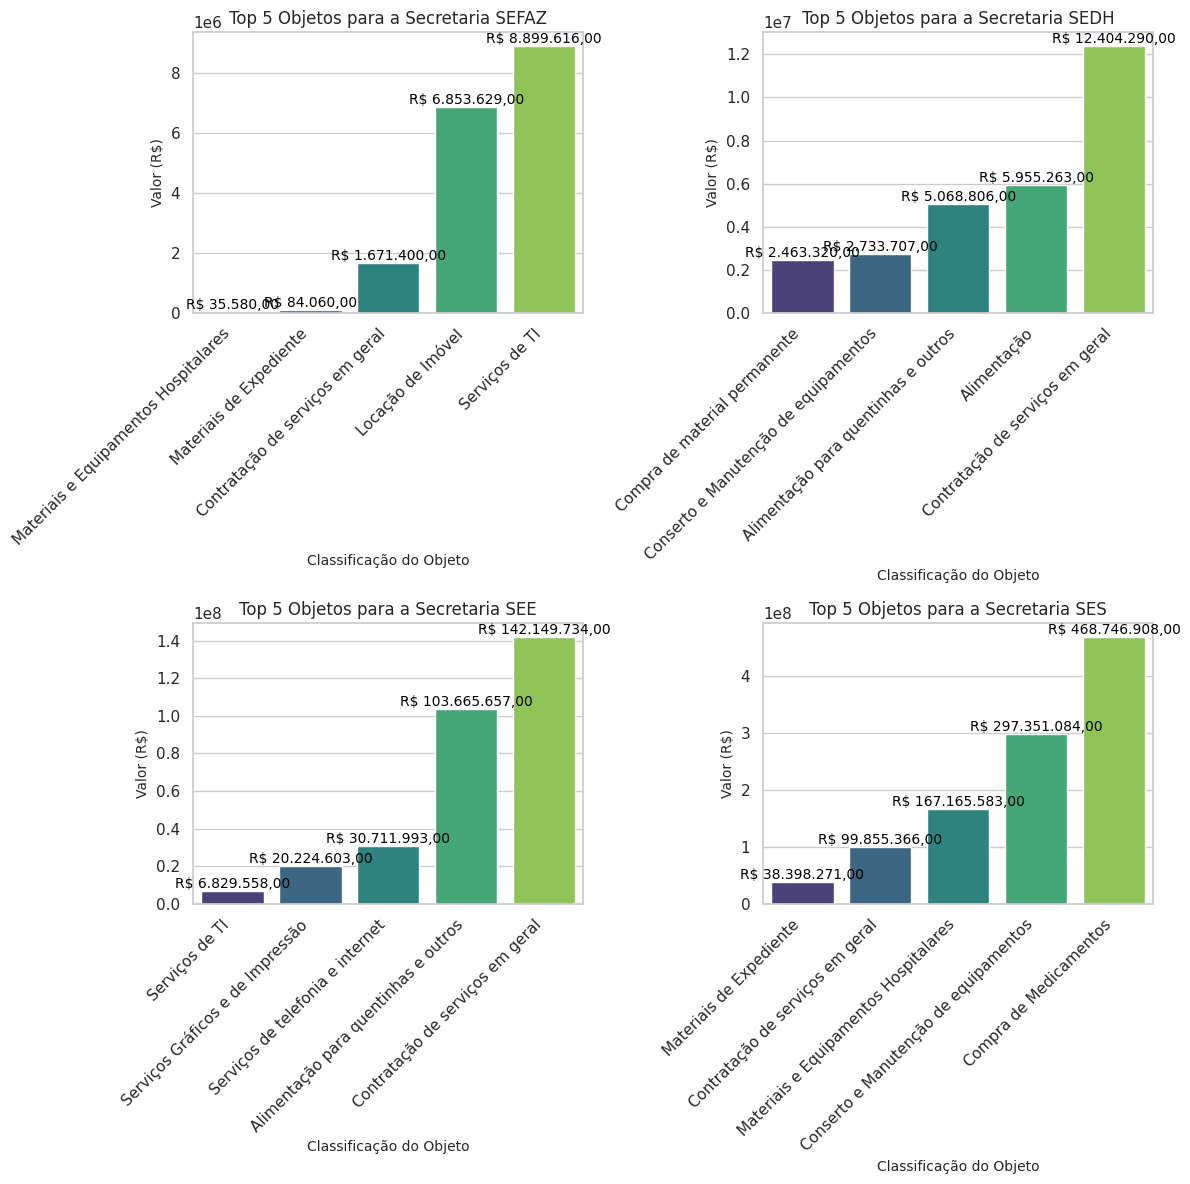

In [69]:
import seaborn as sns


# Lista de secretarias desejadas
secretarias = ['SES', 'SEE', 'SEFAZ', 'SEDH']

# Filtrar o DataFrame para incluir apenas essas secretarias
subset = sec_obj[sec_obj['SIGLA'].isin(secretarias)]

# Definir o estilo do gráfico
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Ajuste o tamanho da figura conforme necessário

# Iterar por cada SIGLA (secretaria)
for idx, sigla in enumerate(subset['SIGLA'].unique()):
    # Filtrar os dados da SIGLA atual
    sigla_data = subset[subset['SIGLA'] == sigla]

    # Identificar a posição do gráfico na matriz (3x2)
    row = idx // 2
    col = idx % 2   # Determina a coluna (resto da divisão)

    # Selecionar o eixo específico para o gráfico
    ax = axes[row, col]

    # Criar o gráfico de barras
    sns.barplot(x='ClassObjeto', y='Valor', data=sigla_data, palette="viridis", ax=ax)

    # Adicionar títulos e rótulos
    ax.set_title(f"Top 5 Objetos para a Secretaria {sigla}", fontsize=12)
    ax.set_xlabel("Classificação do Objeto", fontsize=10)
    ax.set_ylabel("Valor (R$)", fontsize=10)

    # Exibir o valor formatado nas barras
    for p in ax.patches:
        ax.annotate(f'{format_currency(p.get_height(), "BRL", locale="pt_BR")}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Rotacionar os rótulos do eixo X
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()


<ipython-input-95-7a989be99c6c>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(sigla, (row_coords[0][i], row_coords[1][i]), color='blue', fontsize=14)
<ipython-input-95-7a989be99c6c>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(objeto, (col_coords[0][i], col_coords[1][i]), color='#ff7f0e', fontsize=12)


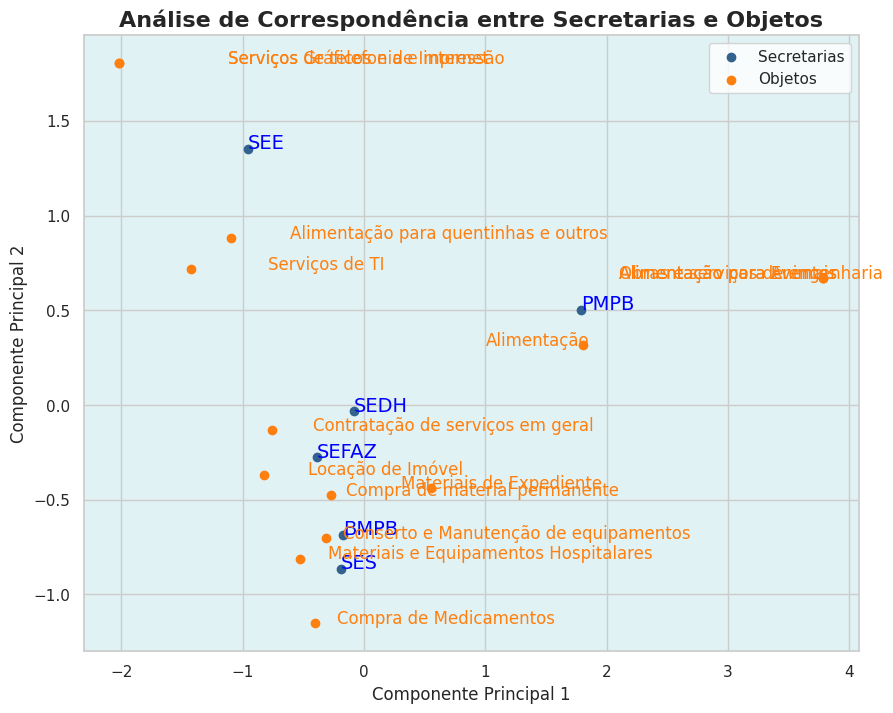

In [95]:
import prince

secretarias = ['SES', 'SEE', 'SEFAZ', 'SEDH', 'PMPB','BMPB']

# Filtrar o DataFrame para incluir apenas essas secretarias
subset = sec_obj[sec_obj['SIGLA'].isin(secretarias)]

contingency_table = pd.crosstab(subset['SIGLA'], subset['ClassObjeto'])

# ca = prince.CA(n_components=2)

# Criando o modelo de Análise de Correspondência (CA)
ca = prince.CA(n_components=2)
ca = ca.fit(contingency_table)

# Agora vamos plotar as coordenadas (mas de forma diferente)
# Podemos acessar as coordenadas para as linhas e colunas
row_coords = ca.row_coordinates(contingency_table)
col_coords = ca.column_coordinates(contingency_table)

# Plotando as coordenadas
fig, ax = plt.subplots(figsize=(10, 8))

# Plotando as coordenadas das linhas (secretarias)
ax.scatter(row_coords[0], row_coords[1], color='#32628d', label='Secretarias')

# Plotando as coordenadas das colunas (objetos)
ax.scatter(col_coords[0]*1.8, col_coords[1], color='#ff7f0e', label='Objetos')

# Adicionando os rótulos para as secretarias e objetos
for i, sigla in enumerate(contingency_table.index):
    ax.annotate(sigla, (row_coords[0][i], row_coords[1][i]), color='blue', fontsize=14)

for i, objeto in enumerate(contingency_table.columns):
    ax.annotate(objeto, (col_coords[0][i], col_coords[1][i]), color='#ff7f0e', fontsize=12)

# Adicionando título e legendas
ax.set_title('Análise de Correspondência entre Secretarias e Objetos', fontsize=16, fontweight=600)
ax.legend(loc='best')
ax.set_facecolor("#e1f2f5")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)

# Mostrar o gráfico
plt.show()

In [ ]:
valor = df['Valor'].dropna()
valor.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.viridis(range(0, 256, int(256 / df['year'].nunique())))

for i, (year, data) in enumerate(df.groupby('year')):
    ax.hist(df['Valor'], bins=10, alpha=0.5, label=year, color=colors[i])
ax.set_title("Distribuição de Valores por Ano", fontsize=16, fontweight='bold')
ax.set_xlabel("Valor", fontsize=14)
ax.set_ylabel("Frequência", fontsize=14)
ax.legend(title="Ano")
ax.grid(True, linestyle="--", alpha=0.5)

plt.show()